In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def exibirImagem(imagem):
    img = plt.figure(figsize = (30, 28))
    ax = img.add_subplot(111)
    ax.imshow(imagem, cmap = "gray")
    plt.show()

item = cv2.imread("marajoara.png")
item = cv2.cvtColor(item, cv2.COLOR_BGR2GRAY)

prateleira = cv2.imread("prateleira.png")
prateleira = cv2.cvtColor(prateleira, cv2.COLOR_BGR2GRAY)

In [2]:
sift = cv2.SIFT_create()

In [3]:
kp1, des1 = sift.detectAndCompute(item, None)
kp2, des2 = sift.detectAndCompute(prateleira, None)

In [4]:
forcaBruta = cv2.BFMatcher()

In [5]:
matches = forcaBruta.knnMatch(des1, des2, k = 2)

In [6]:
# matches[0]

In [7]:
good = []

for match1, match2 in matches:
    if(match1.distance < 0.75 * match2.distance):
        good.append([match1])

In [8]:
len(matches)

3090

In [9]:
len(good)

28

In [10]:
sift_matches = cv2.drawMatchesKnn(item, kp1, prateleira, kp2, good, None, flags = 2)

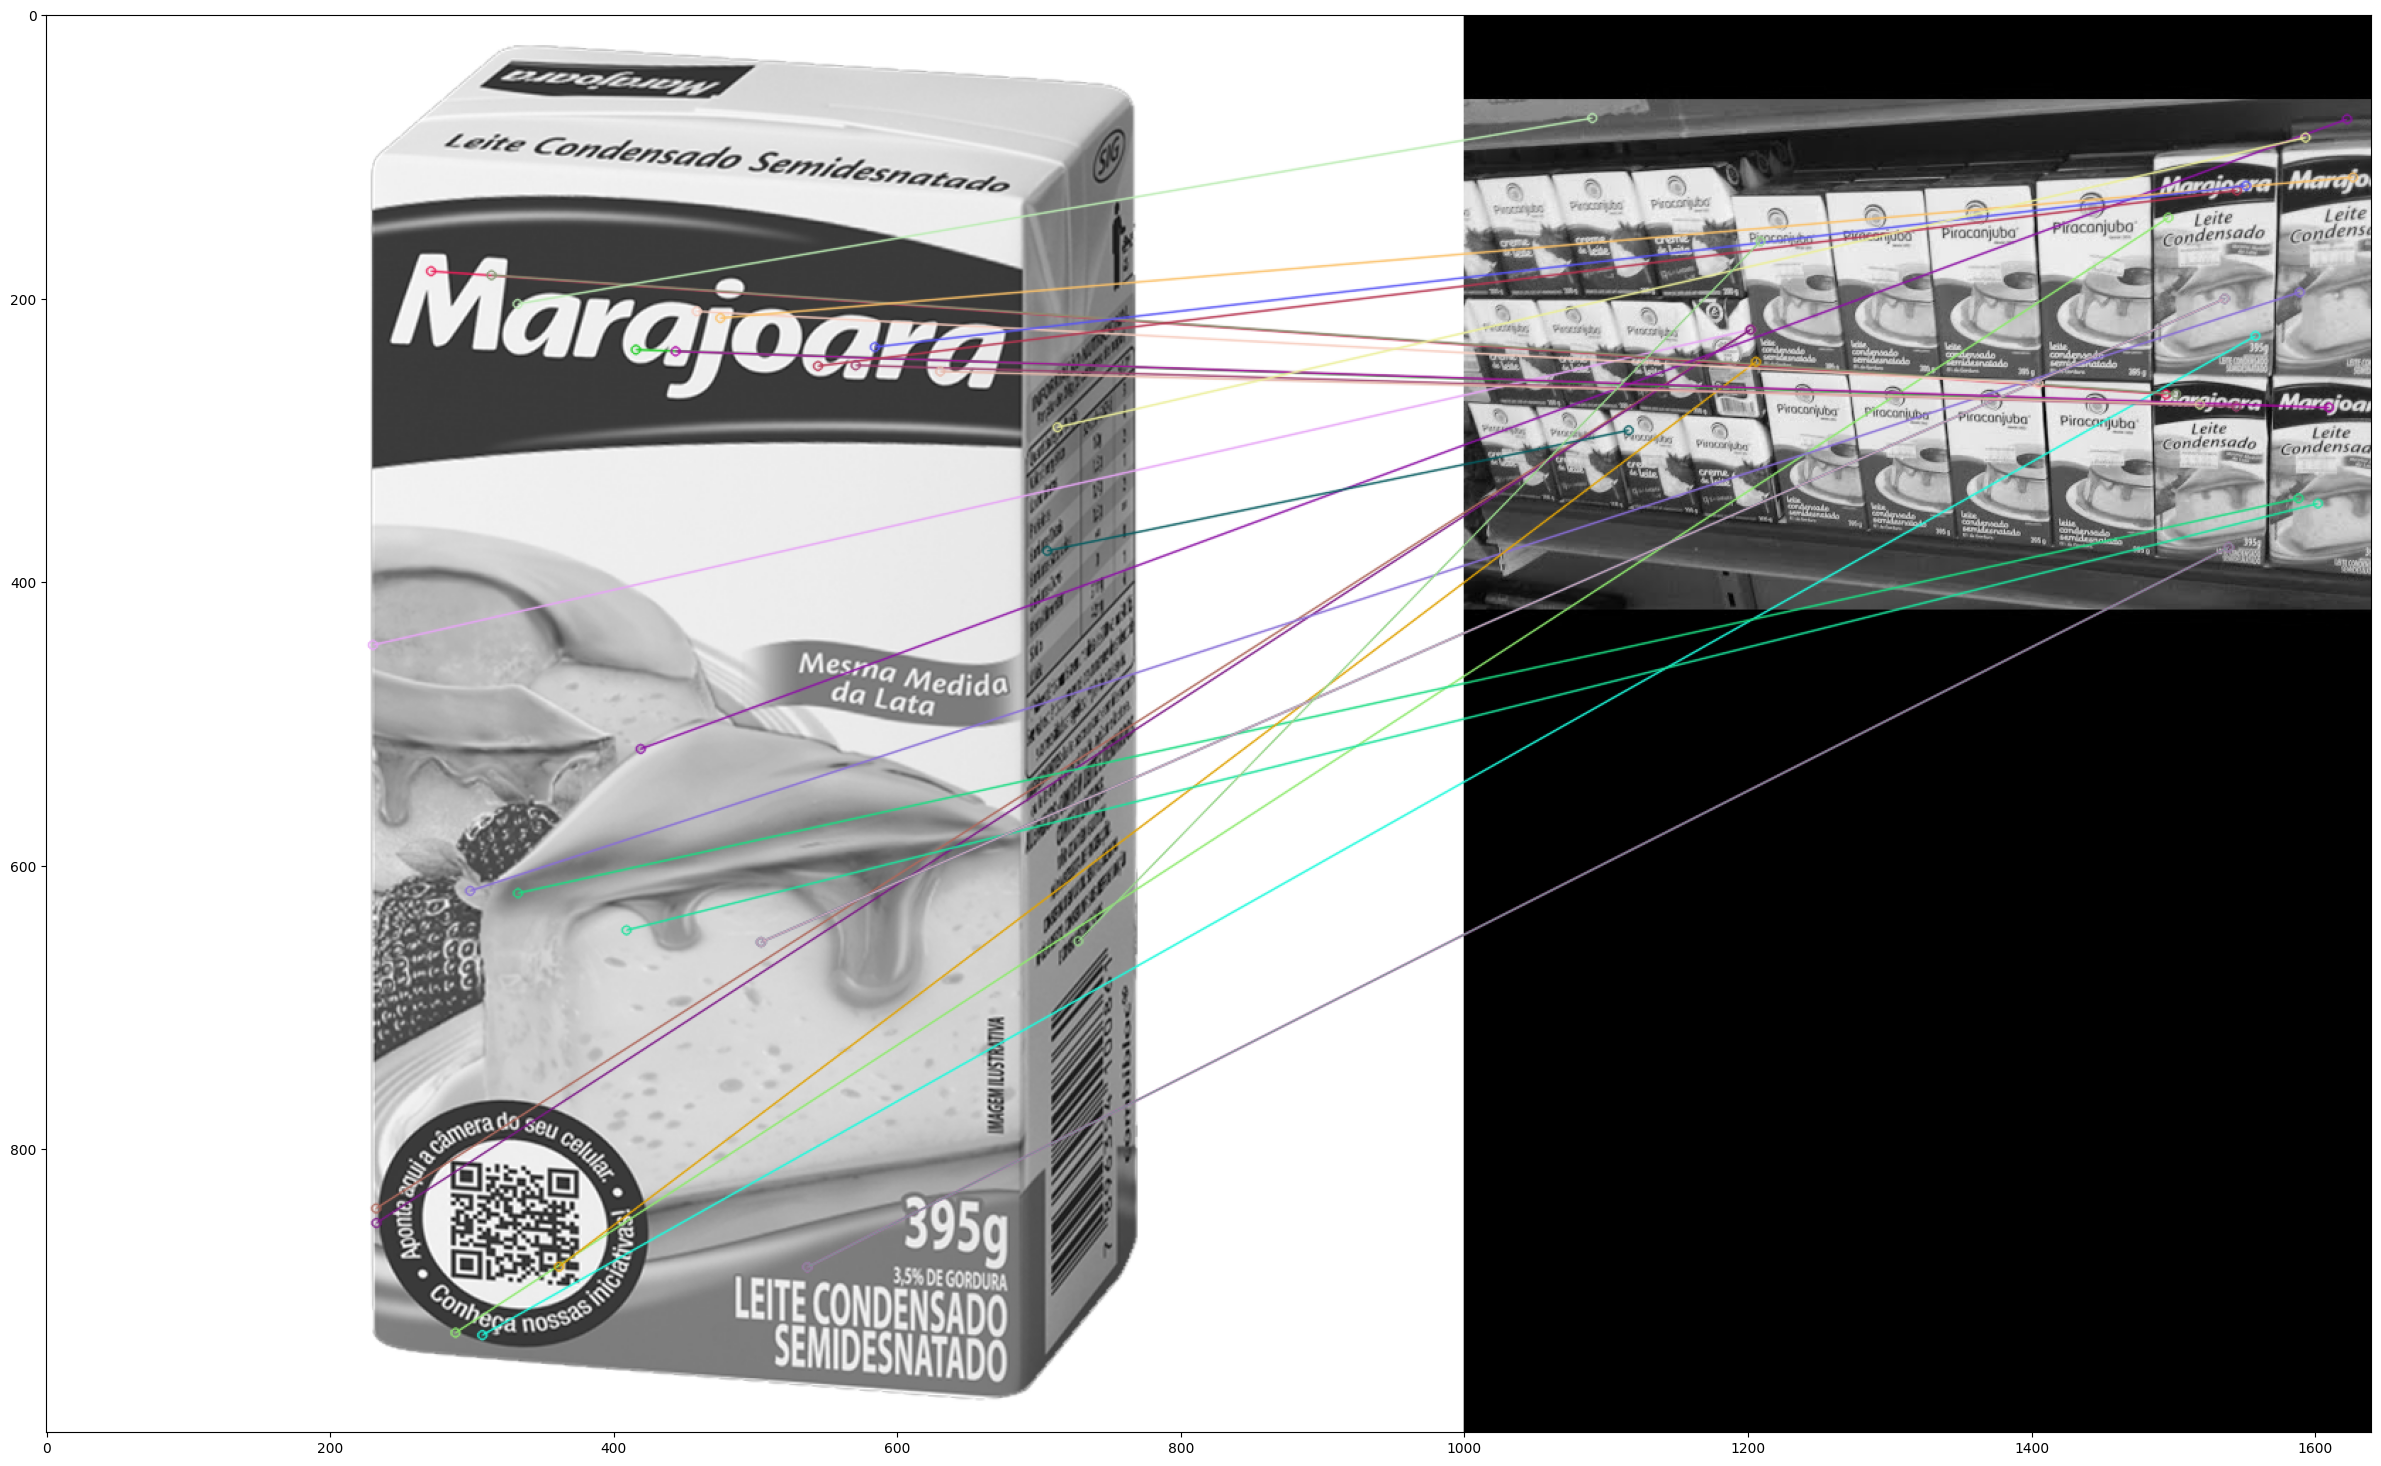

In [11]:
exibirImagem(sift_matches)